In [12]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, linregress
from scipy.stats import multivariate_normal

In [2]:
data_x = [2.00, 2.10, 2.20, 2.30, 2.40, 2.50, 2.60, 2.70, 2.80, 2.90, 3.00] 
                #supongo datos en x sin error.

data_y = [2.78, 3.29, 3.29, 3.33, 3.23, 3.69, 3.46, 3.87, 3.62, 3.40, 3.99]
sigma = 0.3

In [3]:
a1 = []
a2 = []
j=0
while j<=500:
    
    D_x = []    #Datos en x
    for i in data_x:
        D_x+= list(np.zeros(500)+i)

    D_y = []
    for i in data_y:
        D_y+= list(norm.rvs(loc = i, scale=sigma, size=500))

    a1.append(linregress(D_x, D_y)[0])
    a2.append(linregress(D_x, D_y)[1])
    j=j+1


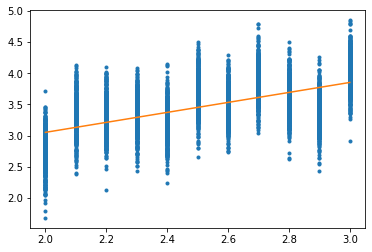

In [4]:
#un ejemplo generico se lo que se ve
x = np.linspace(2,3,100)
plt.plot( D_x, D_y,'.');
plt.plot(x,linregress(D_x, D_y)[0]*x + linregress(D_x, D_y)[1])

(0.012692531589268568, 0.7980106790991646)

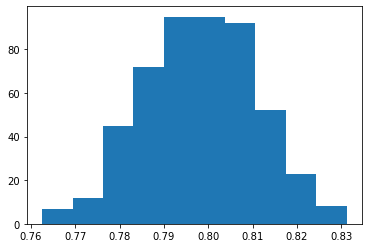

In [5]:
plt.hist(a1);
np.std(a1), np.mean(a1)

(0.032240526698329205, 1.4548193591130605)

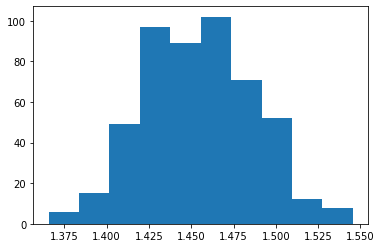

In [7]:
plt.hist(a2);
np.std(a2), np.mean(a2)

In [8]:
linregress(data_x, data_y)

LinregressResult(slope=0.7990909090909094, intercept=1.4522727272727267, rvalue=0.7919240297093963, pvalue=0.003670724510704689, stderr=0.20538190366839446, intercept_stderr=0.517546096836582)

In [11]:
V = np.cov(a1,a2)

ValueError: operands could not be broadcast together with shapes (200,200,2) (501,) 

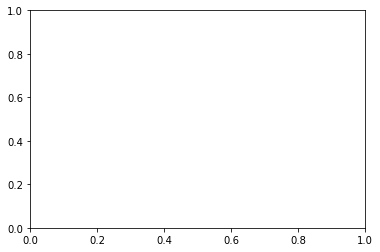

In [17]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))

In [16]:
rv.pdf(pos)

array([[0.06610269, 0.06693599, 0.06776491, ..., 0.01120146, 0.01086205,
        0.01053061],
       [0.06647237, 0.06731255, 0.06814838, ..., 0.0113375 , 0.01099433,
        0.0106592 ],
       [0.06684044, 0.06768751, 0.06853025, ..., 0.01147456, 0.01112761,
        0.01078877],
       ...,
       [0.068655  , 0.06997346, 0.07130156, ..., 0.04181883, 0.04081591,
        0.03982829],
       [0.0682957 , 0.06960954, 0.07093308, ..., 0.04187102, 0.0408682 ,
        0.03988063],
       [0.06793454, 0.06924372, 0.07056262, ..., 0.04192098, 0.0409183 ,
        0.03993084]])

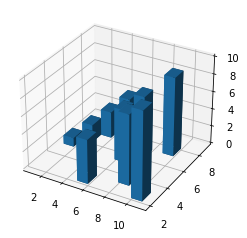

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

# Definimos los datos
x3 = [1,2,3,4,5,6,7,8,9,10]
y3 = [5,6,7,8,2,5,6,3,7,2]
z3 = np.zeros(10)

dx = np.ones(len(a1))
dy = np.ones(len(a2))
dz = [1,2,3,4,5,6,7,8,9,10]

# utilizamos el método bar3d para graficar las barras
ax1.bar3d(a1, a2, z3, dx, dy, dz)

# Mostramos el gráfico
plt.show()
